In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# ODE system for the SIRS model.

In [2]:
def sir_model(t, y, params):
    """ODE system for the SIRS model."""
    S, I, R = y
    beta = params['b0'] * (1 + params['b1'] * np.cos(2 * np.pi * t + params['phi']))
    dSdt = params['mu'] - params['mu'] * S - beta * S * I + params['gamma'] * R
    dIdt = beta * S * I - params['ni'] * I - params['mu'] * I
    dRdt = params['ni'] * I - params['mu'] * R - params['gamma'] * R
    return [dSdt, dIdt, dRdt]

## Solves the SIRS model ODE using scipy's solve_ivp

In [5]:
def solve_sir_model(t_span, initial_conditions, params):
    """Solves the SIRS model ODE using scipy's solve_ivp."""
    solution = solve_ivp(
        fun=sir_model,
        t_span=t_span,
        y0=initial_conditions,
        args=(params,),
        method='RK45',
        dense_output=True
    )
    return solution

### R0

In [6]:
def calculate_R0(params):
    """Calculates the basic reproduction number R0."""
    beta_avg = params['b0']
    gamma = params['gamma']
    nu = params['ni']
    R0 = beta_avg / (gamma + nu)
    # Print basic reproduction number (R0)
    print(f"Basic Reproduction Number (R0): {R0:.2f}")

    # Interpretation of R0
    if R0 < 1:
        print("The infection will likely die out over time.")
    elif R0 == 1:
        print("The infection will remain stable in the population but not cause an outbreak.")
    else:
        print("The infection will likely spread and cause an epidemic.")  

## Simulates and plots the SIRS model

Basic Reproduction Number (R0): 0.96
The infection will likely die out over time.


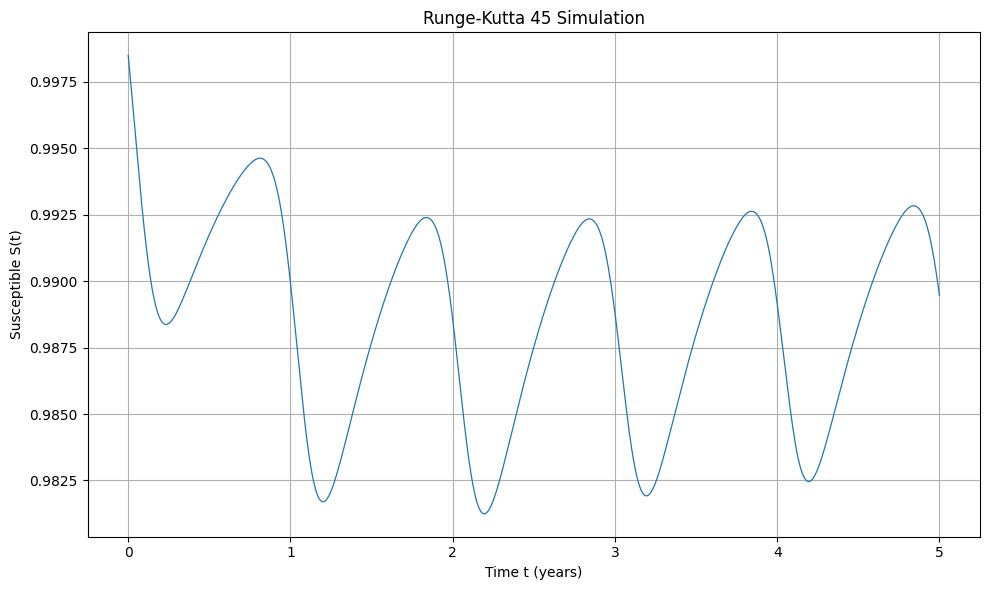

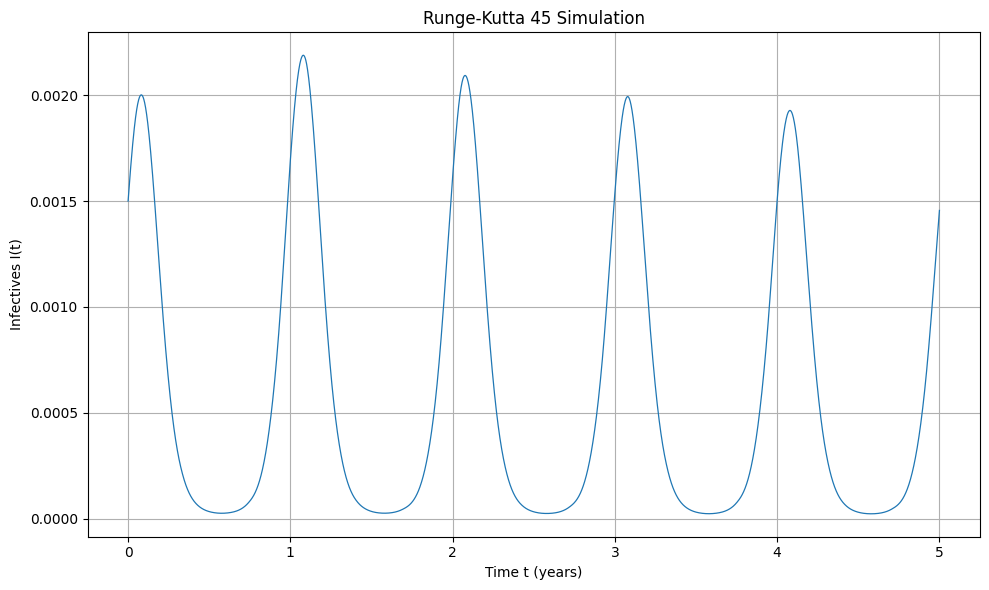

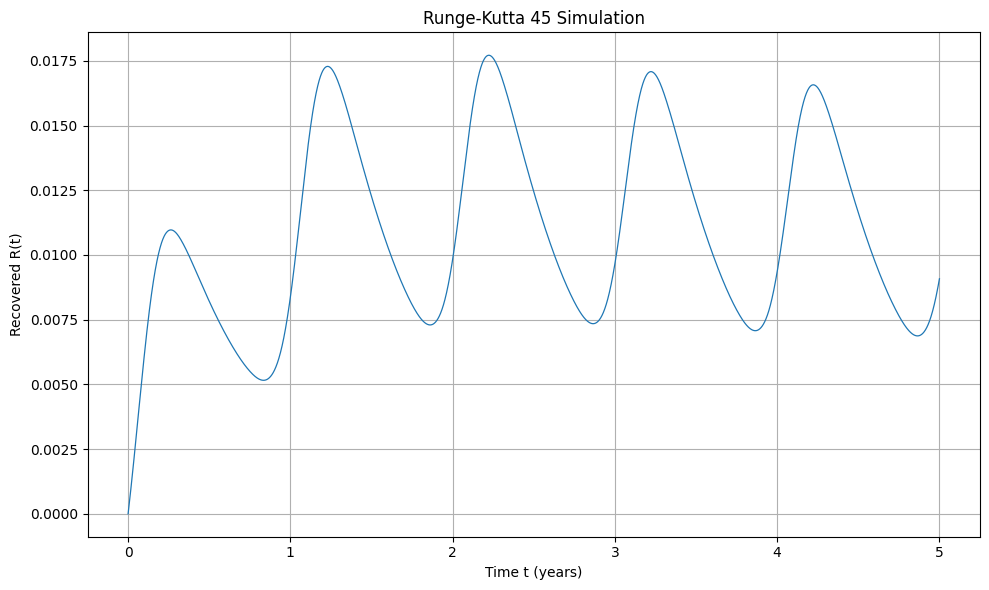

In [8]:
def simulate_and_plot():
    """Simulates and plots the SIRS model."""
    t = np.linspace(0, 5, 5000)
    parameters = {
        'b0': 36.4,
        'b1': 0.38,
        'phi': 1.07,
        'mu': 0.009,
        'gamma': 1.8,
        'ni': 36,
    }
    initial_conditions = {
        'S0': 0.9985,
        'I0': 0.0015,
        'R0': 0.0,
    }

    solution = solve_sir_model([t[0], t[-1]], [initial_conditions['S0'], initial_conditions['I0'], initial_conditions['R0']], parameters)
    simulated_solution = solution.sol(t)

    # Print statistics
    calculate_R0(parameters)
    
    labels_on_y = {0: "Susceptible S(t)", 1: "Infectives I(t)", 2: "Recovered R(t)"}
    
    
    for n in range(3):
        plt.figure(figsize=(10, 6))
        plt.plot(t, simulated_solution[n], linewidth=0.9, label=labels_on_y[n])
        plt.xlabel('Time t (years)')
        plt.ylabel(labels_on_y[n])
        plt.title('Runge-Kutta 45 Simulation')
        plt.tight_layout()
        plt.grid(True)
        plt.savefig(f'Runge-Kutta 45 Simulation {n}.png', dpi=600, bbox_inches='tight')  # Adjust filename and DPI as needed
        plt.show()

simulate_and_plot()